## **DATA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from keras.utils import to_categorical
from keras.models import Sequential , Model
from keras.optimizers import SGD
from keras.utils import plot_model
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau
from sklearn import preprocessing 
import numpy as np
import random
import matplotlib.pyplot as plt
from keras import Model
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from keras.optimizers import SGD, Adam
from keras import Model
from keras.models import load_model
from keras.utils import to_categorical, plot_model
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#!ls "/gdrive/My Drive/Proj3_data"

sample_submission.csv.zip  test_transaction.csv.zip  train_transaction.csv.zip
test_identity.csv.zip	   train_identity.csv.zip


In [ ]:
#!unzip '/gdrive/My Drive/Proj3_data/sample_submission.csv.zip' -d '/gdrive/My Drive/proje3'
#!unzip '/gdrive/My Drive/Proj3_data/train_transaction.csv.zip' -d '/gdrive/My Drive/proje3'
#!unzip '/gdrive/My Drive/Proj3_data/test_transaction.csv.zip' -d '/gdrive/My Drive/proje3'
#!unzip '/gdrive/My Drive/Proj3_data/train_identity.csv.zip' -d '/gdrive/My Drive/proje3'
#!unzip '/gdrive/My Drive/Proj3_data/test_identity.csv.zip' -d '/gdrive/My Drive/proje3'

Archive:  /gdrive/My Drive/Proj3_data/sample_submission.csv.zip
  inflating: /gdrive/My Drive/proje3/sample_submission.csv  
Archive:  /gdrive/My Drive/Proj3_data/train_transaction.csv.zip
  inflating: /gdrive/My Drive/proje3/train_transaction.csv  
Archive:  /gdrive/My Drive/Proj3_data/test_transaction.csv.zip
  inflating: /gdrive/My Drive/proje3/test_transaction.csv  
Archive:  /gdrive/My Drive/Proj3_data/train_identity.csv.zip
  inflating: /gdrive/My Drive/proje3/train_identity.csv  
Archive:  /gdrive/My Drive/Proj3_data/test_identity.csv.zip
  inflating: /gdrive/My Drive/proje3/test_identity.csv  


In [ ]:
sample_submission = pd.read_csv('/gdrive/My Drive/proje3/sample_submission.csv')
train_identity= pd.read_csv('/gdrive/My Drive/proje3/train_identity.csv')
test_identity= pd.read_csv('/gdrive/My Drive/proje3/test_identity.csv')
test_transaction= pd.read_csv('/gdrive/My Drive/proje3/test_transaction.csv')

In [ ]:
train_transaction=pd.read_csv('/gdrive/My Drive/proje3/train_transaction.csv')

In [ ]:
#train_identity.loc[:,'id_03'].fillna('0.0', inplace=True)
#train_identity.loc[:,'id_04'].fillna('0.0', inplace=True)
#train_identity.loc[:,'id_05'].fillna('0.0', inplace=True)
#train_identity.loc[:,'id_06'].fillna('0.0', inplace=True)
#train_identity.loc[:,'id_09'].fillna('0.0', inplace=True)
#train_identity.loc[:,'id_10'].fillna('0.0', inplace=True)
#train_identity.loc[:,'id_13'].fillna('52.0', inplace=True)
#train_identity.loc[:,'id_14'].fillna('-300.0', inplace=True)
#train_identity.loc[:,'id_16'].fillna('NotFound', inplace=True)
#train_identity.loc[:,'id_17'].fillna('266.0', inplace=True)
#train_identity.loc[:,'id_19'].fillna('266.0', inplace=True)
#train_identity.loc[:,'id_20'].fillna('507.0', inplace=True)
#train_identity.loc[:,'id_21'].fillna('252.0', inplace=True)
#train_identity.loc[:,'id_22'].fillna('14.0', inplace=True)
#train_identity.drop(labels=['id_7' , 'id_8' , 'id_18'], axis=1, inplace=True)
#train_identity.info()

In [ ]:
#delete_index = train_identity[train_identity['id_15'].isna() & train_identity['id_35'].isna() & train_identity['id_37'].isna()].index
#train_identity.drop(index = delete_index, inplace=True)

In [ ]:
#delete_index = train_identity[train_identity['id_11'].isna() & train_identity['id_28'].isna() & train_identity['id_29'].isna()].index
#train_identity.drop(index = delete_index, inplace=True)

In [ ]:
train_transaction.tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,87.0,3.0,NaN,aol.com,NaN,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,117.000000,2903.500000,117.000000,117.0,669.500000,0.0,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590539,3577539,0,15811131,279.95,W,15066,170.0,150.0,mastercard,102.0,credit,299.0,87.0,NaN,NaN,gmail.com,NaN,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,1.0,279.950012,279.950012,279.950012,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,279.950012,279.950012,279.950012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in train_transaction.columns.to_list():
  nulls = train_transaction[[i]].isnull().sum()[0]
  print("null datas of " + i)
  print(nulls)

null datas of TransactionID
0
null datas of isFraud
0
null datas of TransactionDT
0
null datas of TransactionAmt
0
null datas of ProductCD
0
null datas of card1
0
null datas of card2
8933
null datas of card3
1565
null datas of card4
1577
null datas of card5
4259
null datas of card6
1571
null datas of addr1
65706
null datas of addr2
65706
null datas of dist1
352271
null datas of dist2
552913
null datas of P_emaildomain
94456
null datas of R_emaildomain
453249
null datas of C1
0
null datas of C2
0
null datas of C3
0
null datas of C4
0
null datas of C5
0
null datas of C6
0
null datas of C7
0
null datas of C8
0
null datas of C9
0
null datas of C10
0
null datas of C11
0
null datas of C12
0
null datas of C13
0
null datas of C14
0
null datas of D1
1269
null datas of D2
280797
null datas of D3
262878
null datas of D4
168922
null datas of D5
309841
null datas of D6
517353
null datas of D7
551623
null datas of D8
515614
null datas of D9
515614
null datas of D10
76022
null datas of D11
279287
nul

In [ ]:
m_column = pd.get_dummies(train_transaction[['M{}'.format(i) for i in range(1, 10)]])
for i in range(1, 10):
  train_transaction.drop('M{}'.format(i), inplace=True, axis=1)
train_transaction = pd.concat([train_transaction,m_column], axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


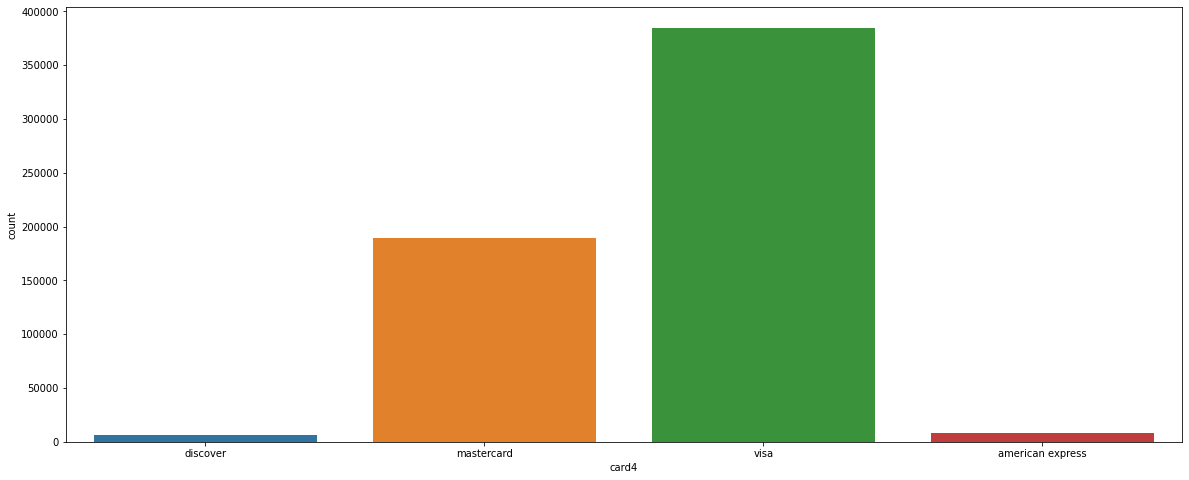

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(train_transaction['card4'])

In [ ]:
categorical_subset = train_transaction[['card4', 'card6' , 'ProductCD' , 'P_emaildomain', 'R_emaildomain']]
categorical_subset = pd.get_dummies(categorical_subset)
categorical_subset.head()

,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,P_emaildomain_cox.net,P_emaildomain_earthlink.net,P_emaildomain_embarqmail.com,P_emaildomain_frontier.com,P_emaildomain_frontiernet.net,P_emaildomain_gmail,P_emaildomain_gmail.com,P_emaildomain_gmx.de,P_emaildomain_hotmail.co.uk,P_emaildomain_hotmail.com,P_emaildomain_hotmail.de,P_emaildomain_hotmail.es,P_emaildomain_hotmail.fr,P_emaildomain_icloud.com,P_emaildomain_juno.com,P_emaildomain_live.com,P_emaildomain_live.com.mx,...,R_emaildomain_hotmail.de,R_emaildomain_hotmail.es,R_emaildomain_hotmail.fr,R_emaildomain_icloud.com,R_emaildomain_juno.com,R_emaildomain_live.com,R_emaildomain_live.com.mx,R_emaildomain_live.fr,R_emaildomain_mac.com,R_emaildomain_mail.com,R_emaildomain_me.com,R_emaildomain_msn.com,R_emaildomain_netzero.com,R_emaildomain_netzero.net,R_emaildomain_optonline.net,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_transaction.drop(labels=['card4', 'card6' , 'ProductCD' , 'P_emaildomain', 'R_emaildomain'], axis=1, inplace=True)
train_transaction = pd.concat([train_transaction, categorical_subset], axis = 1)
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,R_emaildomain_hotmail.de,R_emaildomain_hotmail.es,R_emaildomain_hotmail.fr,R_emaildomain_icloud.com,R_emaildomain_juno.com,R_emaildomain_live.com,R_emaildomain_live.com.mx,R_emaildomain_live.fr,R_emaildomain_mac.com,R_emaildomain_mail.com,R_emaildomain_me.com,R_emaildomain_msn.com,R_emaildomain_netzero.com,R_emaildomain_netzero.net,R_emaildomain_optonline.net,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,NaN,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in train_transaction.columns.to_list():
  nulls = train_transaction[[i]].isnull().sum()[0]
  print("null datas of " + i)
  print(nulls)

null datas of TransactionID
0
null datas of isFraud
0
null datas of TransactionDT
0
null datas of TransactionAmt
0
null datas of card1
0
null datas of card2
8933
null datas of card3
1565
null datas of card5
4259
null datas of addr1
65706
null datas of addr2
65706
null datas of dist1
352271
null datas of dist2
552913
null datas of C1
0
null datas of C2
0
null datas of C3
0
null datas of C4
0
null datas of C5
0
null datas of C6
0
null datas of C7
0
null datas of C8
0
null datas of C9
0
null datas of C10
0
null datas of C11
0
null datas of C12
0
null datas of C13
0
null datas of C14
0
null datas of V1
279287
null datas of V2
279287
null datas of V3
279287
null datas of V4
279287
null datas of V5
279287
null datas of V6
279287
null datas of V7
279287
null datas of V8
279287
null datas of V9
279287
null datas of V10
279287
null datas of V11
279287
null datas of V12
76073
null datas of V13
76073
null datas of V14
76073
null datas of V15
76073
null datas of V16
76073
null datas of V17
76073
n

In [ ]:
delete_index = train_transaction[train_transaction['V137'].isna() & train_transaction['V112'].isna() & train_transaction['V133'].isna()].index
train_transaction.drop(index = delete_index, inplace=True)

In [ ]:
d_column = train_transaction[['D{}'.format(i) for i in range(1, 16)]].fillna(0)
for i in range(1, 16):
  train_transaction.drop('D{}'.format(i), inplace=True, axis=1)
train_transaction = pd.concat([train_transaction, d_column], axis=1)


In [ ]:
for i in train_transaction.columns.to_list():
  nulls = train_transaction[[i]].isnull().sum()[0]
  print("null datas of " + i)
  print(nulls)

null datas of TransactionID
0
null datas of isFraud
0
null datas of TransactionDT
0
null datas of TransactionAmt
0
null datas of card1
0
null datas of card2
8932
null datas of card3
1565
null datas of card5
4258
null datas of addr1
65642
null datas of addr2
65642
null datas of dist1
352035
null datas of dist2
552632
null datas of C1
0
null datas of C2
0
null datas of C3
0
null datas of C4
0
null datas of C5
0
null datas of C6
0
null datas of C7
0
null datas of C8
0
null datas of C9
0
null datas of C10
0
null datas of C11
0
null datas of C12
0
null datas of C13
0
null datas of C14
0
null datas of V1
279123
null datas of V2
279123
null datas of V3
279123
null datas of V4
279123
null datas of V5
279123
null datas of V6
279123
null datas of V7
279123
null datas of V8
279123
null datas of V9
279123
null datas of V10
279123
null datas of V11
279123
null datas of V12
76057
null datas of V13
76057
null datas of V14
76057
null datas of V15
76057
null datas of V16
76057
null datas of V17
76057
n

In [ ]:
drop_columns=[]
nulls=train_transaction.isnull().sum()
for i,j in enumerate(nulls):
  if(j>300000):
    drop_columns.append(i)
len(drop_columns)

161

In [ ]:
drop_columns_name=[]
for i in drop_columns:
  drop_columns_name.append(train_transaction.columns[i])
train_transaction.drop(columns=drop_columns_name, inplace=True)
train_transaction.tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,...,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
590535,3577535,0,15811047,49.00,6550,NaN,150.0,226.0,272.0,87.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.0,29.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,56.0,0.0,0.0,0.0,56.0
590536,3577536,0,15811049,39.50,10444,225.0,150.0,224.0,204.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590537,3577537,0,15811079,30.95,12037,595.0,150.0,224.0,231.0,87.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590538,3577538,0,15811088,117.00,7826,481.0,150.0,224.0,387.0,87.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.0,22.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,22.0,22.0,0.0,0.0,0.0,22.0
590539,3577539,0,15811131,279.95,15066,170.0,150.0,102.0,299.0,87.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
train_transaction.fillna(train_transaction.mean(), inplace=True)
train_transaction.tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,...,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
590535,3577535,0,15811047,49.00,6550,362.556834,150.0,226.0,272.0,87.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.0,29.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,56.0,0.0,0.0,0.0,56.0
590536,3577536,0,15811049,39.50,10444,225.000000,150.0,224.0,204.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590537,3577537,0,15811079,30.95,12037,595.000000,150.0,224.0,231.0,87.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590538,3577538,0,15811088,117.00,7826,481.000000,150.0,224.0,387.0,87.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.0,22.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,22.0,22.0,0.0,0.0,0.0,22.0
590539,3577539,0,15811131,279.95,15066,170.000000,150.0,102.0,299.0,87.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
nulls = train_transaction.isnull().sum()
nulls[nulls>0]

Series([], dtype: int64)

In [ ]:
train_Y = train_transaction[['isFraud']]
train_X = train_transaction.drop(['TransactionID', 'TransactionDT'] , axis=1, inplace=False)
train_X = train_X.drop('isFraud', axis=1, inplace=False)
sc = MinMaxScaler()
train_X = sc.fit_transform(train_X)
train_X

array([[2.13697908e-03, 7.43044378e-01, 5.25113667e-01, ...,
        0.00000000e+00, 1.80205415e-01, 8.62785863e-02],
       [9.00174530e-04, 1.00885261e-01, 6.08000000e-01, ...,
        0.00000000e+00, 1.80205415e-01, 8.62785863e-02],
       [1.83951976e-03, 2.10565647e-01, 7.80000000e-01, ...,
        0.00000000e+00, 1.80205415e-01, 4.13721414e-01],
       ...,
       [9.61231970e-04, 6.34456197e-01, 9.90000000e-01, ...,
        0.00000000e+00, 1.80205415e-01, 8.62785863e-02],
       [3.65558719e-03, 3.92389055e-01, 7.62000000e-01, ...,
        0.00000000e+00, 1.80205415e-01, 1.09147609e-01],
       [8.75779735e-03, 8.08576684e-01, 1.40000000e-01, ...,
        0.00000000e+00, 1.80205415e-01, 8.73180873e-02]])

**DATA(TEST)**




In [ ]:
test_transaction.tail()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,284.0,60.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,157.0,hotmail.com,hotmail.com,1.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,NaN,NaN,0.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.0,31.7237,0.0,0.0,31.7237,0.0,0.0,31.7237,31.7237,31.7237,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,327.0,87.0,NaN,NaN,hotmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506689,4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,177.0,87.0,NaN,NaN,hotmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506690,4170239,34214345,24.346,C,5713,168.0,144.0,visa,147.0,credit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,29.958332,0.958333,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
m_columns = pd.get_dummies(test_transaction[['M{}'.format(i) for i in range(1, 10)]])
for i in range(1, 10):
  test_transaction.drop('M{}'.format(i), inplace=True, axis=1)
test_transaction = pd.concat([test_transaction,m_columns], axis=1)

In [ ]:
for i in test_transaction.columns.to_list():
  nulls = test_transaction[[i]].isnull().sum()[0]
  print("null datas of " + i)
  print(nulls)

null datas of TransactionID
0
null datas of TransactionDT
0
null datas of TransactionAmt
0
null datas of ProductCD
0
null datas of card1
0
null datas of card2
8654
null datas of card3
3002
null datas of card4
3086
null datas of card5
4547
null datas of card6
3007
null datas of addr1
65609
null datas of addr2
65609
null datas of dist1
291217
null datas of dist2
470255
null datas of P_emaildomain
69192
null datas of R_emaildomain
370821
null datas of C1
3
null datas of C2
3
null datas of C3
3
null datas of C4
3
null datas of C5
3
null datas of C6
3
null datas of C7
3
null datas of C8
3
null datas of C9
3
null datas of C10
3
null datas of C11
3
null datas of C12
3
null datas of C13
4748
null datas of C14
3
null datas of D1
6031
null datas of D2
234769
null datas of D3
203142
null datas of D4
76851
null datas of D5
224375
null datas of D6
381908
null datas of D7
446558
null datas of D8
432353
null datas of D9
432353
null datas of D10
12545
null datas of D11
176518
null datas of D12
437437


In [ ]:
categorical_subset = test_transaction[['card4', 'card6' , 'ProductCD' , 'P_emaildomain', 'R_emaildomain']]
categorical_subset = pd.get_dummies(categorical_subset)
categorical_subset.head()

,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,P_emaildomain_cox.net,P_emaildomain_earthlink.net,P_emaildomain_embarqmail.com,P_emaildomain_frontier.com,P_emaildomain_frontiernet.net,P_emaildomain_gmail,P_emaildomain_gmail.com,P_emaildomain_gmx.de,P_emaildomain_hotmail.co.uk,P_emaildomain_hotmail.com,P_emaildomain_hotmail.de,P_emaildomain_hotmail.es,P_emaildomain_hotmail.fr,P_emaildomain_icloud.com,P_emaildomain_juno.com,P_emaildomain_live.com,P_emaildomain_live.com.mx,P_emaildomain_live.fr,...,R_emaildomain_hotmail.de,R_emaildomain_hotmail.es,R_emaildomain_hotmail.fr,R_emaildomain_icloud.com,R_emaildomain_juno.com,R_emaildomain_live.com,R_emaildomain_live.com.mx,R_emaildomain_live.fr,R_emaildomain_mac.com,R_emaildomain_mail.com,R_emaildomain_me.com,R_emaildomain_msn.com,R_emaildomain_netzero.com,R_emaildomain_netzero.net,R_emaildomain_optonline.net,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_transaction.drop(labels=['card4', 'card6' , 'ProductCD' , 'P_emaildomain', 'R_emaildomain'], axis=1, inplace=True)
test_transaction = pd.concat([test_transaction, categorical_subset], axis = 1)
test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,...,R_emaildomain_hotmail.de,R_emaildomain_hotmail.es,R_emaildomain_hotmail.fr,R_emaildomain_icloud.com,R_emaildomain_juno.com,R_emaildomain_live.com,R_emaildomain_live.com.mx,R_emaildomain_live.fr,R_emaildomain_mac.com,R_emaildomain_mail.com,R_emaildomain_me.com,R_emaildomain_msn.com,R_emaildomain_netzero.com,R_emaildomain_netzero.net,R_emaildomain_optonline.net,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
0,3663549,18403224,31.95,10409,111.0,150.0,226.0,170.0,87.0,1.0,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3663550,18403263,49.00,4272,111.0,150.0,226.0,299.0,87.0,4.0,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,NaN,NaN,NaN,634.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3663551,18403310,171.00,4476,574.0,150.0,226.0,472.0,87.0,2635.0,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,136.0,NaN,NaN,NaN,97.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3663552,18403310,284.95,10989,360.0,150.0,166.0,205.0,87.0,17.0,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,242.0,NaN,NaN,NaN,242.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3663553,18403317,67.95,18018,452.0,150.0,117.0,264.0,87.0,6.0,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN,22.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
d_columns = test_transaction[['D{}'.format(i) for i in range(1, 16)]].fillna(0)
for i in range(1, 16):
  test_transaction.drop('D{}'.format(i), inplace=True, axis=1)
test_transaction = pd.concat([test_transaction, d_columns], axis=1)


In [ ]:
len(drop_columns)

161

In [ ]:
test_transaction.drop(columns=drop_columns_name, inplace=True)
test_transaction.tail()

In [ ]:
test_transaction.fillna(test_transaction.mean, inplace=True)
test_transaction.tail()

In [ ]:
test_X = test_transaction.drop(['TransactionID', 'TransactionDT'] , axis=1, inplace=False)
sc = MinMaxScaler()
test_X = sc.fit_transform(test_X)

##**MODEL**

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   mode='auto',
                   verbose=1,
                   patience=5)

lrr= ReduceLROnPlateau(monitor='val_loss',
                       factor=0.1, 
                       patience=3, 
                       min_lr=1e-7)

In [ ]:
encoder_input = Input(367,name = 'input_encoder')
encoder = Dense(367 , activation='tanh', name = 'encoder_layer1')(encoder_input)
encoder = BatchNormalization(name = 'encoder_layer2')(encoder)
encoder = Dropout(0.2 , name = 'encoder_layer3')(encoder)
encoder = Dense(256 ,  activation='relu' , name = 'encoder_layer4')(encoder)
encoder = Dense(128 ,  activation='relu' , name = 'encoder_layer5')(encoder)
encoder_output = Dense(64 ,  activation='relu' , name = 'encoder_layer6')(encoder)

decoder_input = Input(64 ,name = 'input_decoder')
decoder = Dense(64 ,  activation='tanh' , name = 'decoder_layer1')(decoder_input)
decoder = Dense(128 ,  activation='relu' , name = 'decoder_layer2')(decoder)
decoder = Dropout(0.2 , name = 'decoder_layer3')(decoder)
decoder = BatchNormalization(name = 'decoder_layer4')(decoder)
decoder = Dense(256 ,  activation='relu' , name = 'decoder_layer5')(decoder)
decoder_output = Dense(367 ,  activation='sigmoid' , name ='output_layer')(decoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')
Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')

Encoder.summary()
Decoder.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 367)]             0         
_________________________________________________________________
encoder_layer1 (Dense)       (None, 367)               135056    
_________________________________________________________________
encoder_layer2 (BatchNormali (None, 367)               1468      
_________________________________________________________________
encoder_layer3 (Dropout)     (None, 367)               0         
_________________________________________________________________
encoder_layer4 (Dense)       (None, 256)               94208     
_________________________________________________________________
encoder_layer5 (Dense)       (None, 128)               32896     
_________________________________________________________________
encoder_layer6 (Dense)       (None, 64)                8256

In [ ]:
autoencoder_input = Input(367,name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

autoencoder.summary()

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_autoencoder (InputLaye [(None, 367)]             0         
_________________________________________________________________
Encoder (Functional)         (None, 64)                271884    
_________________________________________________________________
Decoder (Functional)         (None, 367)               140335    
Total params: 412,219
Trainable params: 411,229
Non-trainable params: 990
_________________________________________________________________


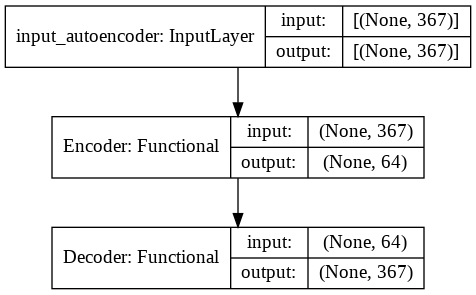

In [ ]:
plot_model(autoencoder, show_shapes=True)

In [ ]:
sgd = SGD(lr=0.01, momentum=0.99)
autoencoder.compile(optimizer='adam' , loss='mae')
history = autoencoder.fit(train_X, train_X,
                    batch_size = 128,
                    validation_split = 0.2,
                              epochs= 100,
                              verbose=1,
                              callbacks=[es , lrr])

Epoch 1/100
3689/3689 [==============================] - 57s 15ms/step - loss: 0.0331 - val_loss: 0.0174
Epoch 2/100
3689/3689 [==============================] - 55s 15ms/step - loss: 0.0155 - val_loss: 0.0147
Epoch 3/100
3689/3689 [==============================] - 55s 15ms/step - loss: 0.0137 - val_loss: 0.0135
Epoch 4/100
3689/3689 [==============================] - 56s 15ms/step - loss: 0.0127 - val_loss: 0.0128
Epoch 5/100
3689/3689 [==============================] - 56s 15ms/step - loss: 0.0122 - val_loss: 0.0123
Epoch 6/100
3689/3689 [==============================] - 56s 15ms/step - loss: 0.0118 - val_loss: 0.0119
Epoch 7/100
3689/3689 [==============================] - 56s 15ms/step - loss: 0.0111 - val_loss: 0.0121
Epoch 8/100
3689/3689 [==============================] - 57s 15ms/step - loss: 0.0108 - val_loss: 0.0117
Epoch 9/100
3689/3689 [==============================] - 56s 15ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 10/100
3689/3689 [==============================]

In [ ]:
autoencoder.save_weights("/gdrive/My Drive/autoencoderWEIGHT.h5")

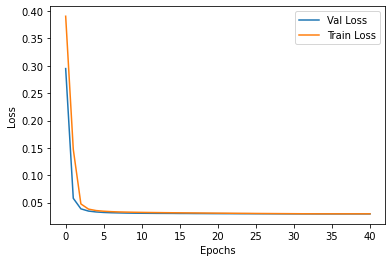

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val Loss','Train Loss'], loc='upper right')
plt.show()

In [ ]:
input_model = Input(64,name = 'input_layer')

model1 = Dense(64, activation='relu')(input_model)
model1 = Dense(32, activation='relu')(model1)
model1 = BatchNormalization()(model1)
model1 = Dropout(0.2)(model1)
model1 = Dense(8, activation='relu')(model1)
output = Dense(2, activation='softmax')(model1)

model = Model(inputs= [input_model], outputs=[output])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18    

In [ ]:
es1 = EarlyStopping(monitor='val_loss',
                   mode='auto',
                   verbose=1,
                   patience=5)

lrr1 = ReduceLROnPlateau(monitor='val_loss',
                       factor=0.01, 
                       patience=2, 
                       min_lr=1e-8)
y = pd.get_dummies(train_Y.isFraud)
latent_vector = Encoder.predict(train_X)

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics = ['accuracy'])
history1 = model.fit(
    latent_vector,
    y.values,
    validation_split=0.2,
    epochs=100,
    verbose=1,
    callbacks=[es1 , lrr1]
)

Epoch 1/100
14756/14756 [==============================] - 23s 1ms/step - loss: 0.1521 - accuracy: 0.9623 - val_loss: 0.1304 - val_accuracy: 0.9656
Epoch 2/100
14756/14756 [==============================] - 22s 1ms/step - loss: 0.1348 - accuracy: 0.9651 - val_loss: 0.1291 - val_accuracy: 0.9656
Epoch 3/100
14756/14756 [==============================] - 22s 1ms/step - loss: 0.1341 - accuracy: 0.9645 - val_loss: 0.1286 - val_accuracy: 0.9655
Epoch 4/100
14756/14756 [==============================] - 22s 1ms/step - loss: 0.1319 - accuracy: 0.9649 - val_loss: 0.1285 - val_accuracy: 0.9655
Epoch 5/100
14756/14756 [==============================] - 22s 1ms/step - loss: 0.1320 - accuracy: 0.9647 - val_loss: 0.1277 - val_accuracy: 0.9656
Epoch 6/100
14756/14756 [==============================] - 22s 1ms/step - loss: 0.1295 - accuracy: 0.9653 - val_loss: 0.1298 - val_accuracy: 0.9655
Epoch 7/100
14756/14756 [==============================] - 22s 1ms/step - loss: 0.1298 - accuracy: 0.9651 - val_

In [ ]:
model.save_weights("/gdrive/My Drive/modelthreeWEIGHT.h5")

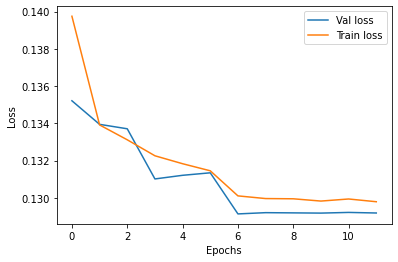

In [ ]:
val_loss = history1.history['val_loss']
loss = history1.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val loss','Train loss'], loc='upper right')
plt.show()

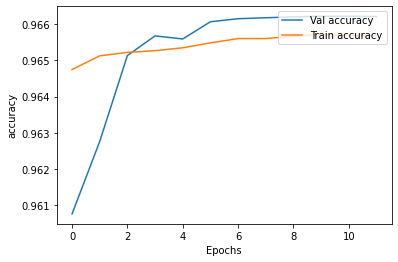

In [ ]:
val_accuracy = history1.history['val_accuracy']
accuracy = history1.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.show()

In [ ]:
pred = model.predict(latent_vector,verbose=1)
pred = np.argmax(pred, axis=1)
score = metrics.accuracy_score(pred, train_Y)

print(score)

18445/18445 [==============================] - 15s 833us/step
0.9652810957158783


In [ ]:
train_Y.isFraud[1]

0

In [ ]:
eshtebah = 0
eshtebahprime = 0
dorost = 0
for i in range (400000) :
    if (pred[i]==1 and train_Y.isFraud[i]==0):
      eshtebahprime=eshtebahprime+1
    elif (pred[i]==0 and train_Y.isFraud[i]==1):
      eshtebah=eshtebah+1
    else: dorost=dorost+1
print ("be eshtebah jaal tashkhis dade shod")
print(eshtebahprime)
print ("bayad jaal tashkhis dade mishod")
print(eshtebah)
print ("dorost")
print(dorost)

be eshtebah jaal tashkhis dade shod
118
bayad jaal tashkhis dade mishod
13660
dorost
386222
